![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 1 - Essential Linear Algebra </center>
### <center> $L^p$ norm</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/01_EssentialLinearAlgebra/MainLpNorm.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size': 16})

#### Create a 1D axis:

In [2]:
v = np.linspace(-1.25, 1.25, 250) #-- 1D grid
v.shape

(250,)

#### Create a 2D axis:

In [3]:
XX1, XX2 = np.meshgrid(v, v)
XX1.shape, XX2.shape

((250, 250), (250, 250))

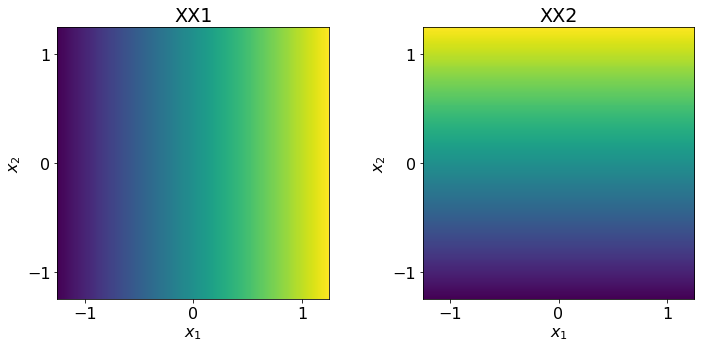

In [4]:
lXX    = [XX1,    XX2]
lTitle = ['XX1', 'XX2']
fig, _ = plt.subplots(1, 2, figsize=(12, 5))
for ii, ax in enumerate(fig.axes):
    ax.matshow(lXX[ii], extent=(v[0], v[-1], v[0], v[-1]), origin='lower')
    ax.set_title(lTitle[ii])
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.xaxis.tick_bottom()

In [5]:
#-- Reshape the grid:
mX = np.stack([XX1.ravel(), XX2.ravel()], axis=0)
mX.shape

(2, 62500)

$L^p$ norm:
$$\left\Vert \boldsymbol{x}\right\Vert _{p}^{p}=\sum_{i=1}^{d}\left|x_{i}\right|^{p}$$

In [6]:
def LpNorm(mX, p):
    return np.sum(np.abs(mX)**p, axis=0) #-- ||x||ₚᵖ

In [7]:
def PlotLpNorm(p = 2):
    if p >= 5:
        p = np.Inf
    
    #-- Compare Lp norm to 1:
    Z = LpNorm(mX, p) <= 1
    Z = Z.reshape(XX1.shape)
        
    #-- Plot related stuff:
    #-- color:
    cyan  = (0,   .75, .75)
    red   = (.75, 0,   0  )
    white = (1,   1,   1  )
    color = cyan if p >= 1 else red
    
    #-- title:
    pStr = '\infty' if np.isinf(p) else str(p)
    if p % 1 < 0.001:
        pStr = f'{p:.0f}' #-- round integer

    #-- plot:
    plt.figure  (figsize=(6,6))
    plt.grid    (True, linestyle='--', linewidth=.3)
    plt.axhline (y=0,  color='k',      linewidth=3)
    plt.axvline (x=0,  color='k',      linewidth=3)
    plt.contourf(XX1,  XX2, 2*Z-1,     colors=[(1,1,1), color], alpha=0.75)
    plt.title   (r'$||x||_{' + pStr + '}\leq 1$', fontsize = 30)
    plt.xlabel  ('$x_1$')
    plt.ylabel  ('$x_2$')

In [8]:
from ipywidgets import interact, FloatSlider, Layout

interact(PlotLpNorm, p=FloatSlider(min=.25, max=5, step=.25, value=2, layout=Layout(width='80%')))
plt.show()

interactive(children=(FloatSlider(value=2.0, description='p', layout=Layout(width='80%'), max=5.0, min=0.25, s…